# Mask 개념

- 포토샵에 마스크와 같은 기능
- 딥러닝에서는 잘 안나오지만, 이미지 처리의 기본이므로 알려줌

cv2 의 bitwise_and 파라미터를 보면 mask 등장

(function) bitwise_and: (src1: Mat, src2: Mat, dts: Mat = ..., mask: Mat = ...) -> Any

https://docs.opencv.org/4.x/d0/d86/tutorial_py_image_arithmetics.html

이미지 (cv 공식 깃)
https://github.com/opencv/opencv/tree/master/samples/data

=> 브렌치 버전을 master 로 해야 함

---

## Image Blending

g(x)=(1−α)f0(x)+αf1(x)

- 어떤 수를 넣어도 평균이 변하지 않음 (평균이 변하지 않고 밝기를 조절)
- 가중치 구조와 비슷

---

# Bitwise Operations

- 위 과정들은 이 연산을 하기 위한 밑바탕

https://docs.opencv.org/4.x/d0/d86/tutorial_py_image_arithmetics.html

참고  
https://opencv-python.readthedocs.io/en/latest/doc/09.imageThresholding/imageThresholding.html

In [1]:
import cv2

In [2]:
# Load two images
im1 = cv2.imread('messi5.jpg')
im2 = cv2.imread('opencv-logo-white.png')

In [3]:
import matplotlib.pyplot as plt

---
이미지 보는 방식

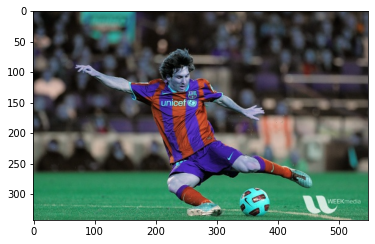

In [4]:
# cv2로 이미지를 처음 불러오면 색이 다름

plt.imshow(im1)

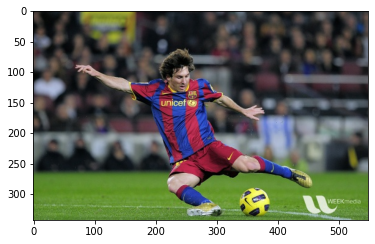

In [5]:
# np 방식으로 색 보정

plt.imshow(im1[...,::-1])

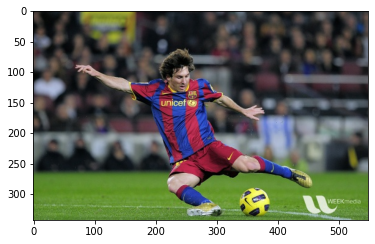

In [6]:
# color_BGR 로 보정

plt.imshow(cv2.cvtColor(im1, cv2.COLOR_BGR2RGB))

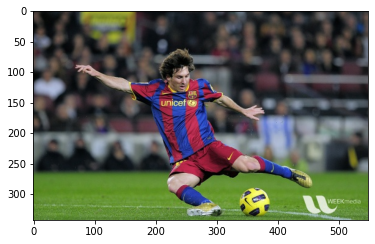

In [7]:
# merge 로 보정 (rgb 순서 바꿔주기)

b,g,r = cv2.split(im1)
im11 = cv2.merge((r,g,b))
plt.imshow(im11)

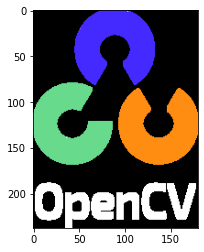

In [8]:
plt.imshow(im2)

In [9]:
# 하얀색과 검은색의 역할
# 이미지에서 bitwise 계산할때 어떻게 하나. 

### [핵심] bitwise 연산에서 검은색 0, 흰색 1 이 되야 함. ###
### 어떤 필터와 연산하면 자기자신은 1이 되는 것을 찾는다. ###

# bitwise 연산에서 자기 자신만 나오게 하는 것. 1로만 이주어진 2진법은 자기자신을 반환
# 3 은 11 => 2자리수 2진법은 자기자신 반환
# 7 = 111 => 3자리수 2진법은 자기자신 반환

# ex) 7 = 111 이므로, 5(100) / 6(101) 과 연산을 하면 =>
# ex) 7과 5연산     
#       111
#       100
#       ---  = 1과 1은 => 1 / 1과 0 은 0
#       100  => 1끼리 연산한 1만 남고 나머지는 0을 반환 => 100 반환 => 5.

# 흰색(1)으로 bitwise 하면 자기자신, 검은색(0)으로 bitwise 하면 모두 0이 된다.

In [10]:
im2 = cv2.imread('opencv-logo-white.png', cv2.IMREAD_GRAYSCALE)

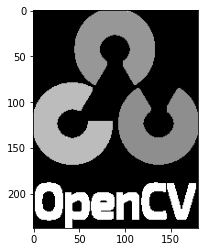

In [11]:
# 컬러를 흑백으로 바꾸기
plt.imshow(im2, cmap='gray')

In [53]:
# 이미지 임계처리 (threshold)
# 일정 값 이상은 흰색 / 이하는 검은색 => 문턱 값을 줘서 흑백으로 만들기

mask = cv2.threshold(im2, 31, 225, cv2.THRESH_BINARY)[1]
#               이미지, 문턱값 (10), max(225), 바이너리로 바꾼다.
#                   (10 보다 작으면 흑 , 크면 백)
# 문턱값을 바꾸면 표현 색이 달라진다.

# mask 처리

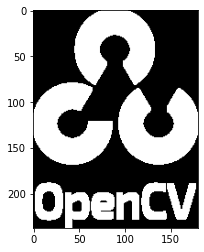

In [54]:
plt.imshow(mask, cmap='gray')

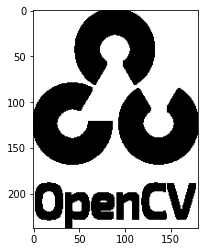

In [55]:
# bitwise_not 쓰면 흰색과 검은색이 바뀜 (반전)
plt.imshow(cv2.bitwise_not(mask), cmap='gray')

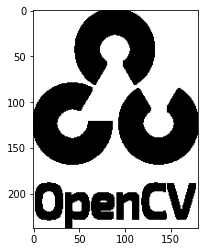

In [56]:
# 마스크를 반전
mask_inv = cv2.bitwise_not(mask)

plt.imshow(mask_inv, cmap='gray')

---

In [16]:
# 메시 그림위에 로고를 띄우고 싶다면,
# 흰색과 만나면 메시 원본 그대로, 검은색을만나면 검은색으로 연산

In [17]:
# 색 제대로 보기
im1 = cv2.imread('messi5.jpg')[...,::-1]
im2 = cv2.imread('opencv-logo-white.png', cv2.IMREAD_GRAYSCALE)

In [18]:
im2.shape

(238, 180)

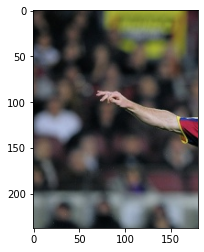

In [19]:
# cv2 로고만큼 잘라주기
im1_crop = im1[:238, :180]
plt.imshow(im1_crop)

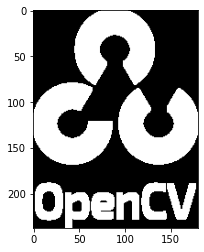

In [20]:
# 마스크
plt.imshow(mask, cmap='gray')

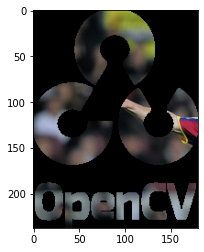

In [21]:
plt.imshow(cv2.bitwise_and(im1_crop, im1_crop, mask=mask))

# 마스크 , mask 는 = 검정은 검정으로, 흰색은 자기자신으로 출력

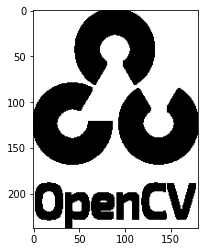

In [57]:
# 마스크 반전
plt.imshow(mask_inv, cmap='gray')

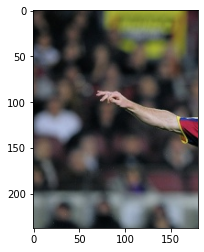

In [62]:
# 마스크를 반전 출력
plt.imshow(cv2.bitwise_and(im1_crop, im1_crop, mask=mask_inv))

In [ ]:
# 0508 : 2:25:35 

---
opencv 최고 성능

https://docs.opencv.org/4.x/dc/d71/tutorial_py_optimization.html

In [53]:
x = 2

In [55]:
x * x

4

In [56]:
 x ** 2

4

In [57]:
# 위 2개 속도가 다르다 (내부적 연상 방법이 다름)


"""
In [11]: %timeit y=x**2
10000000 loops, best of 3: 73 ns per loop
In [12]: %timeit y=x*x
10000000 loops, best of 3: 58.3 ns per loop
"""

'\nIn [11]: %timeit y=x**2\n10000000 loops, best of 3: 73 ns per loop\nIn [12]: %timeit y=x*x\n10000000 loops, best of 3: 58.3 ns per loop\n'